### 最適化アルゴリズム

単純に勾配降下法を適用すると、局所解に捕まる問題は先に述べた通り。  
分かりやすくサンプルを考えてみると

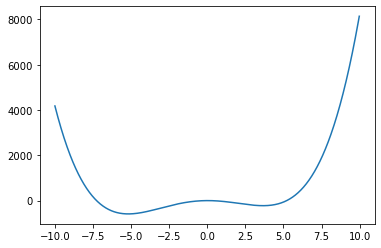

In [16]:
import numpy as np
import matplotlib.pyplot as plt


def func(x):
    return x*x*x*x + 2*x*x*x + -38*x*x + 2*x


X = np.arange(-10, 10, 0.02)
Y = func(X)

plt.plot(X, Y)
plt.show()

微分済みの関数は

In [17]:
def delta_func(x):
    return 4*x*x*x + 6*x*x -76*x + 2


# ここに 7,5 を突っ込むと
delta_func(7.5)

1457.0

傾斜凄いので、学習バイアスを仮に 0.001 位で想定すると

In [26]:
alpha = 0.001

current = 7.5
old = 0

while abs(current - old) >= 0.0001:
    val = delta_func(current)
    old = current
    current = current - val * alpha
    print(current)

6.043
5.398451459972
5.002559811688421
4.729832392627848
4.529821496454675
4.377177480355534
4.257423546210319
4.161559438372887
4.08363734432107
4.019540738521101
3.9663154081729166
3.921778562920445
3.8842783889882955
3.8525397914062047
3.8255618877089477
3.802547822422183
3.7828554545321524
3.7659619202774888
3.7514376555641213
3.738927013088748
3.7281335693034587
3.7188088267724755
3.7107434149131473
3.7037601564458242
3.697708546081601
3.692460311597264
3.6879058140851497
3.6839511057739855
3.6805155082174594
3.67752960604679
3.6749335754017194
3.6726757840045647
3.6707116133011746
3.669002463340202
3.6675149089369588
3.6662199817732937
3.665092557858305
3.664110833537009
3.663255876222559
3.6625112384189564
3.661862625528296
3.66129760949993
3.660805381655323
3.660376539070622
3.66000289976476
3.659677342659728
3.659393668879335
3.6591464814553354
3.658931080932697
3.658743374723007
3.6585797983577586
3.658437247050682
3.658313016197765
3.658204749631204
3.6581103946042393
3.6581

とまぁこんな感じで、明らかに `x=-5....` の方が正解にもかかわらず途中の `3.7` 近辺に捕まってしまう。  
この局所解を回避するのが最適化アルゴリズムと言ってるご様子。

## 確率的勾配降下法

訓練用データの中からパラメータの更新毎に、ランダムなサンプルを選び出すことで、局所解に捕まりにくくする。  
要するに開始位置をランダムに指定するだけだ。

## Momentum

確率的勾配降下法に、慣性項を設けたというもの。  
前回の更新量に追加でいくらかの値を設定する。

In [35]:
alpha = 0.001
beta = 2.7

current = 7.5
old = 0
last_w = 0

while abs(current - old) >= 0.0001:
    val = delta_func(current)
    old = current
    new_w = - val * alpha
    current = current + new_w + last_w * beta
    last_w = new_w
    print(current)

6.043
1.4645514599719993
-0.19185848304183395
0.01781967384422567
-0.028117364030085537
-0.034007546495780354
-0.049781152307481306
-0.06797555468750062
-0.0908220708732037
-0.11919109008260265
-0.15449030499302088
-0.19842989237099845
-0.2531637961781708
-0.3213951916117546
-0.4065204632656256
-0.5128039739962857
-0.6455851164892475
-0.811505062953562
-1.0187130348474362
-1.2769506763333995
-1.5972879184477984
-1.9910472381536204
-2.4670630301924907
-3.0259552354009642
-3.6501120398108458
-4.2903596099875925
-4.857995698852847
-5.2432719228484554
-5.378492294207526
-5.310361906090113
-5.183472682866072
-5.11814546137427
-5.130192900046406
-5.171949378752106
-5.2003881616104
-5.2032190237025935
-5.191354001667161
-5.180269368221342
-5.1771810299574925
-5.180181249424525
-5.184162051676043
-5.185922174066375
-5.185379292975573
-5.184060245776873
-5.183254760318419
-5.183254259207195


見ての通り、下がるときに慣性を利用して追加で下がるので、パラメータさえ合ってれば局所解を乗り越えていく。

## AdaGrad

2011 年に現れたアルゴリズムで、学習が進むたびに学習係数を減らそうという試み。

$$
h \leftarrow  h + (\frac{\partial E}{\partial w})^2 \\
w \leftarrow w - \eta \frac{1}{\sqrt{h}}\frac{\partial E}{\partial w}
$$

In [46]:
import math

h = 0
current = 7.5
old = 0

while abs(current - old) >= 0.0001:
    val = delta_func(current)
    h = h + val * val
    new_w = - val / math.sqrt(h)
    old = current
    current = current + new_w
    print(current)

print(current)

6.5
5.991688924667466
5.646410961134836
5.386994732474357
5.181464168891868
5.013125259836374
4.87204852326966
4.7518067607144445
4.647984515962909
4.557410990822424
4.47772972020331
4.407140798818975
4.344238282940154
4.287903250227089
4.23723099543947
4.1914800066613
4.150035310462555
4.1123815712304745
4.078082977842838
4.04676795652729
4.018117381523742
3.991855364159257
3.9677419716725204
3.945567410183514
3.925147332371601
3.906319018896746
3.8889382456169352
3.8728766941891757
3.8580197969761705
3.8442649318798843
3.8315199012281496
3.8197016428478148
3.808735132162399
3.798552442405527
3.789091936457758
3.780297568841414
3.772118280375192
3.764507471142559
3.757422539948691
3.7508244804687685
3.744677525931404
3.738948835515955
3.733608216734055
3.728627878962639
3.723982214036123
3.719647600419263
3.7156022279933074
3.711825940915271
3.7083000963686423
3.705007437325738
3.7019319776970567
3.6990588984593322
3.6963744535380294
3.6938658843770793
3.6915213422630684
3.68932981758

この h が毎回デカくなるから、学習もその都度抑えられるという仕組みだが、弱点として途中で `h` がデカくなりすぎて更新が止まることがある点。  
今回は見事にそれ。

## RMSProp

論文は存在してない？

$$
h \leftarrow \rho h + (1 - \rho) (\frac{\partial E}{\partial w})^2 \\
w \leftarrow w - \eta \frac{1}{\sqrt{h}}\frac{\partial E}{\partial w}
$$

$\rho$ を仕込むことで、以前の h をある程度忘れるという式ですね。